In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as datetime

In [2]:
df_train = pd.read_csv('../data/train.csv')

In [3]:
features=pd.read_csv('../data/features.csv')
stores= pd.read_csv('../data/stores.csv')

In [4]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
features_stores = features.merge(stores, how='inner', on='Store')

In [8]:
df= df_train.merge(features_stores, how='inner', on=['Store', 'Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True).copy()

In [9]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [10]:
df['IsHoliday'].unique()

array([False,  True])

In [11]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


In [12]:
df = df.loc[df['Weekly_Sales'] > 0]

Now we watch weekly sales in holidays 

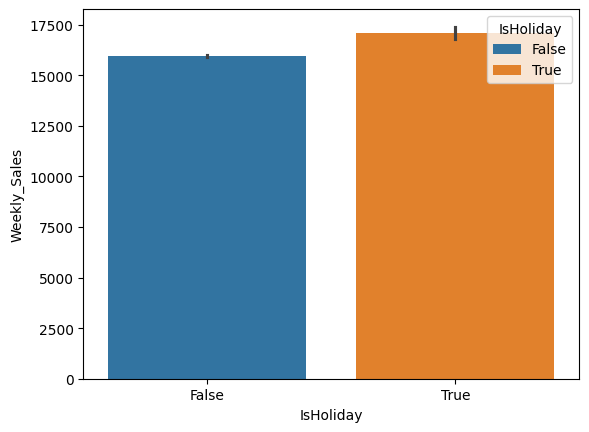

In [14]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, hue='IsHoliday')
plt.show()

We see that in the average there are more sales on holidays than in non holidays.

# Now we see effect of each Holiday seperately

In [17]:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [18]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [19]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [20]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

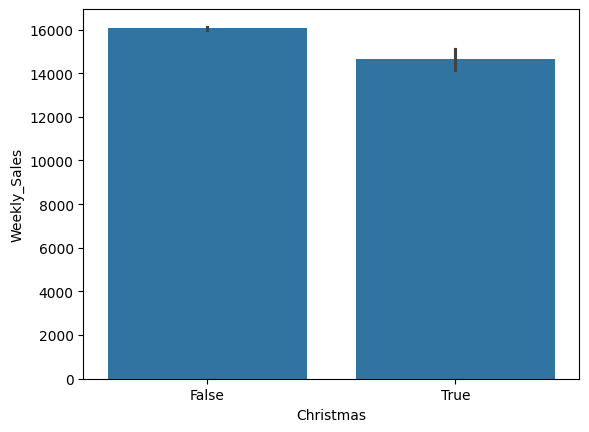

In [21]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas
plt.show()

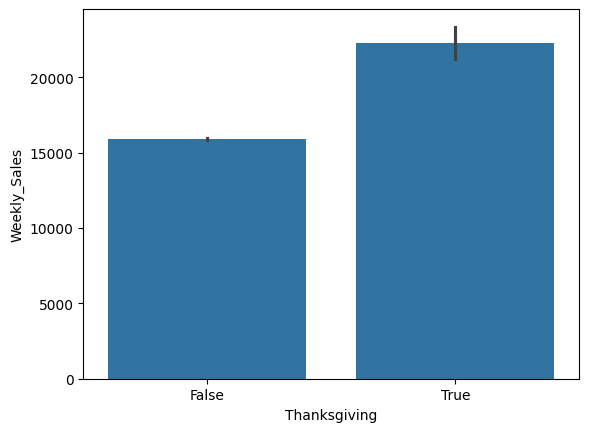

In [22]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving
plt.show()

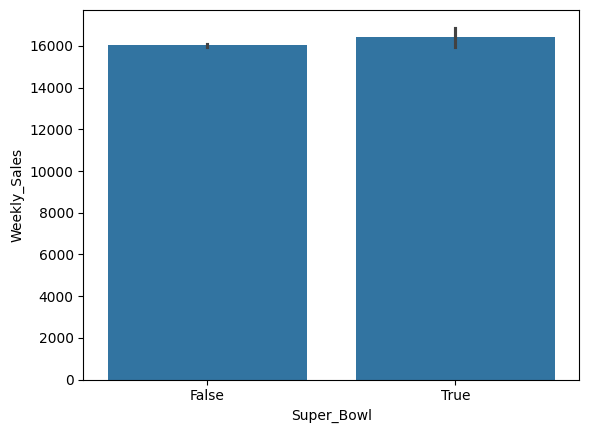

In [23]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl
plt.show()

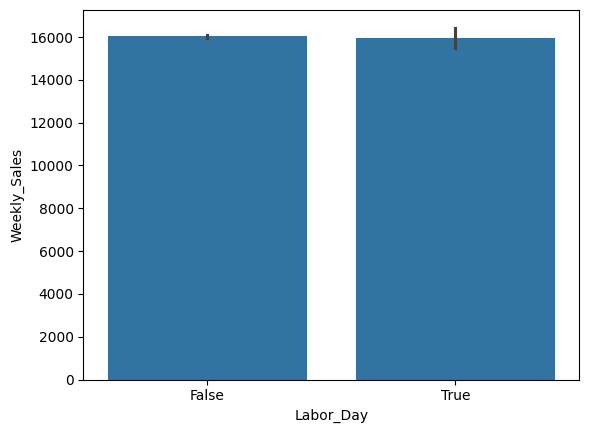

In [24]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day
plt.show()

It seems that in Thanksgiving are highest sales.

# Markdown Columns 

In [27]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [28]:
df = df.fillna(0)

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11192\3475559988.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


In [29]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

# Department - Weekly sales analysis

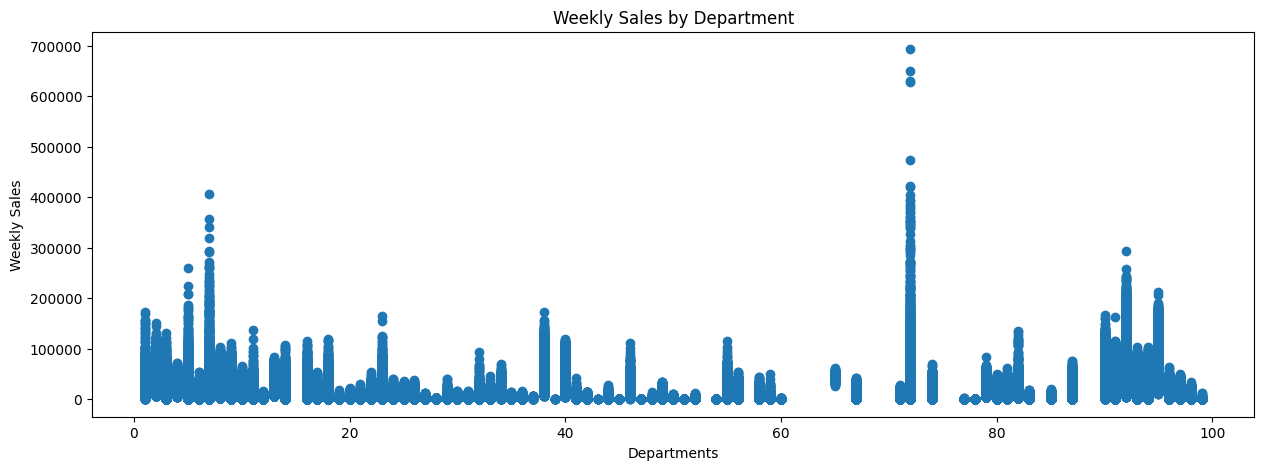

In [31]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

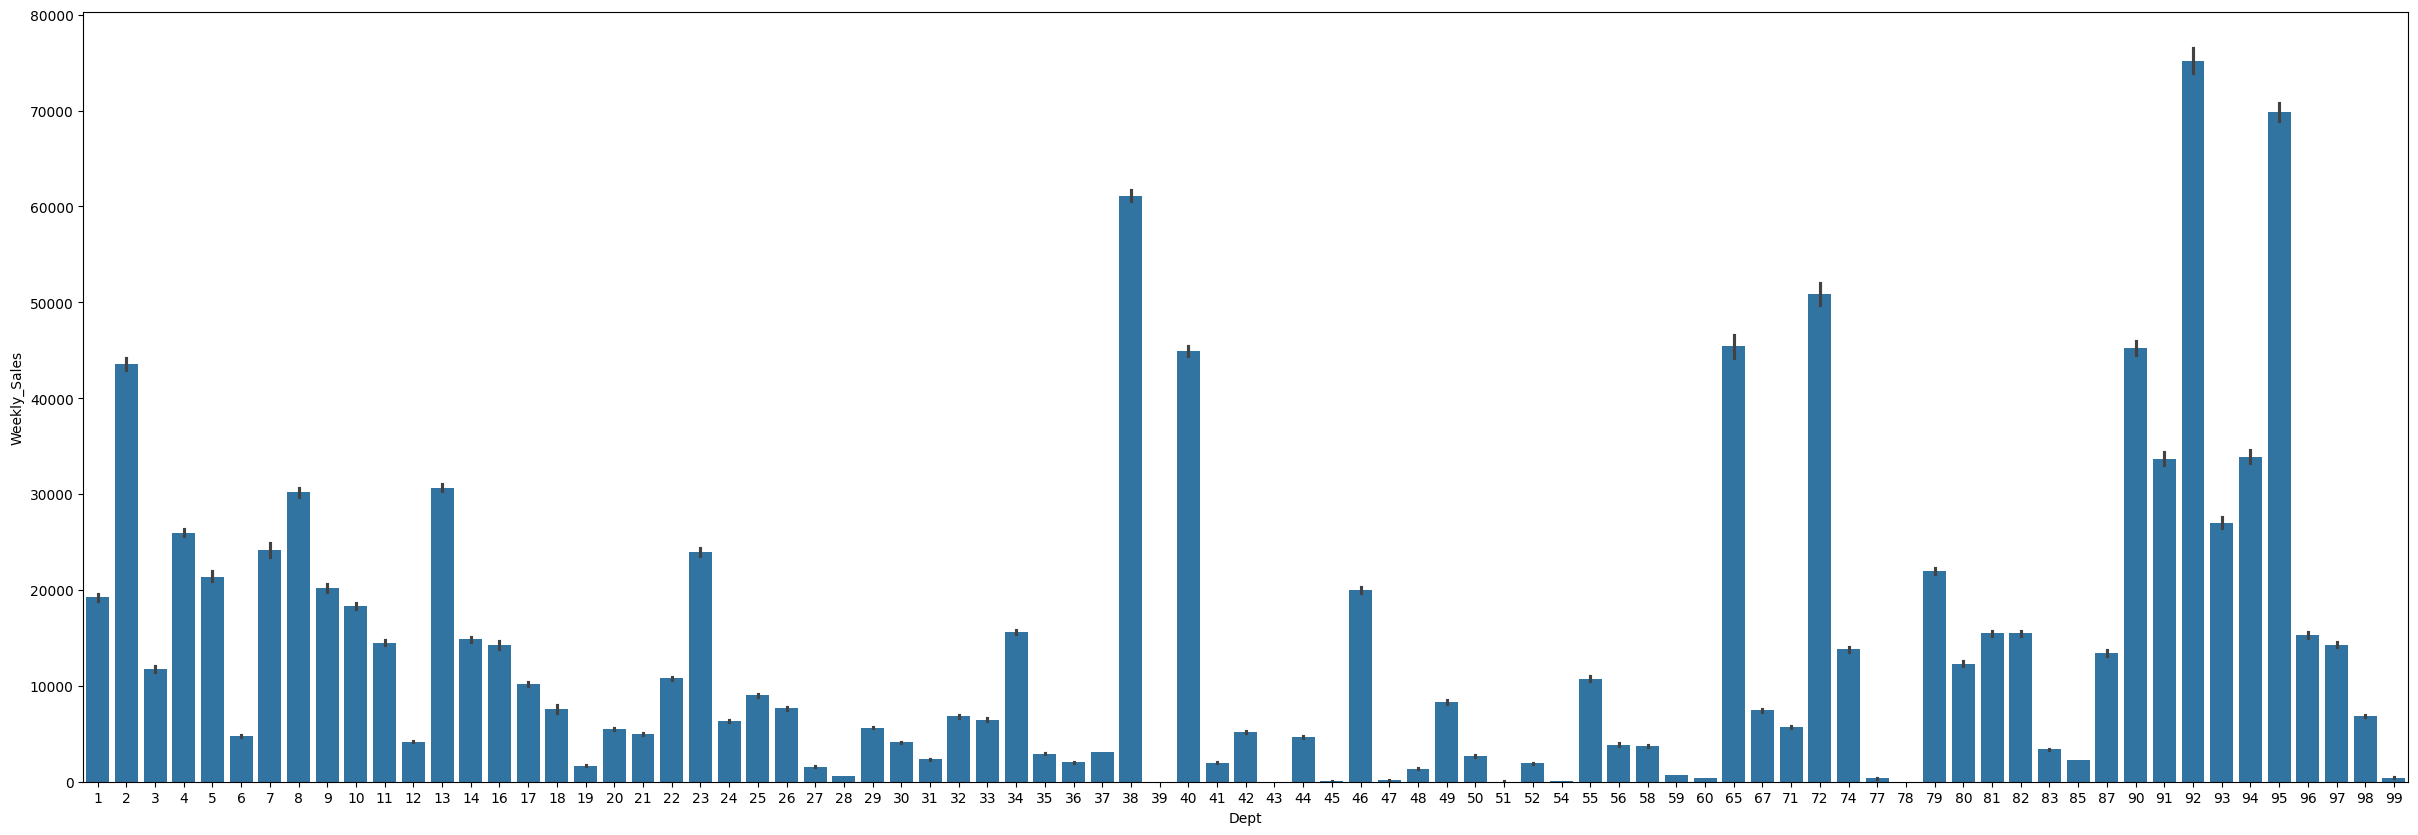

In [32]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.show()

We see that in some seasons 72 has more sales, but in average 92 does better.

# Changing Date Columns

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df['Week'] = df['Date'].dt.isocalendar().week

In [37]:
df['Month'] = df['Date'].dt.month

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Type', y='Size', data=df)

<Axes: xlabel='Type', ylabel='Size'>

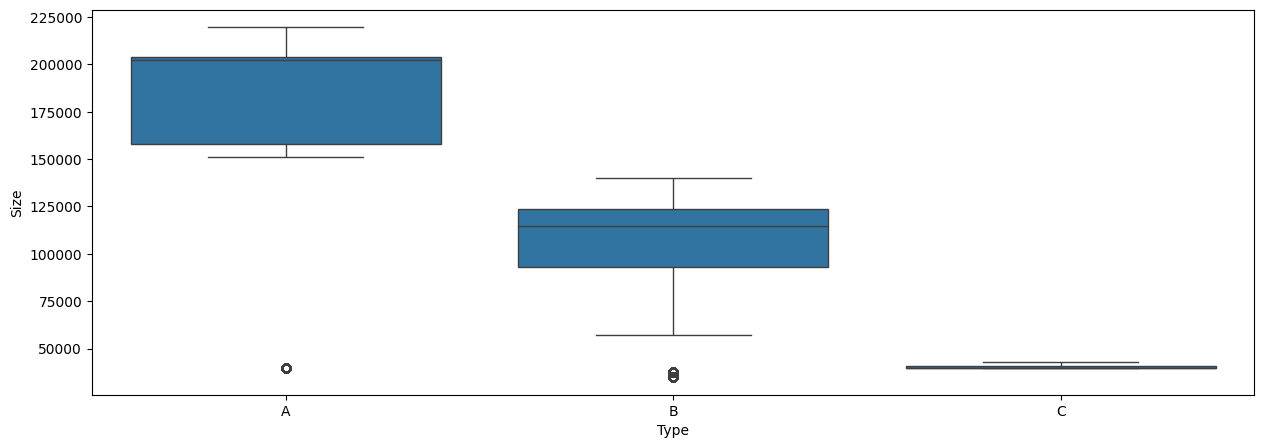

In [39]:
plt.show()

We see that they are divided by size with Type A the biggest, Type B the middle and Type C the smallest

In [41]:
df['Year'] = df['Date'].dt.year

In [42]:
df.groupby('Month')['Weekly_Sales'].mean() # to see the best months for sales

Month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [43]:
df.groupby('Year')['Weekly_Sales'].mean() # to see the best years for sales

Year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

In [44]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

<Axes: xlabel='Month'>

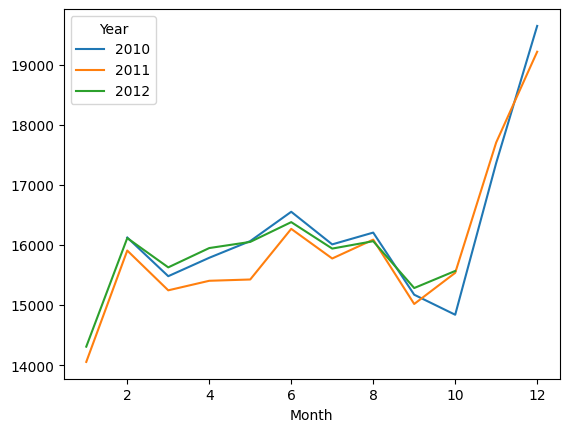

In [45]:
plt.show()

We see that 2010 has more sales than 2011, as for 2012 we have missing data on 11 and 12 month 

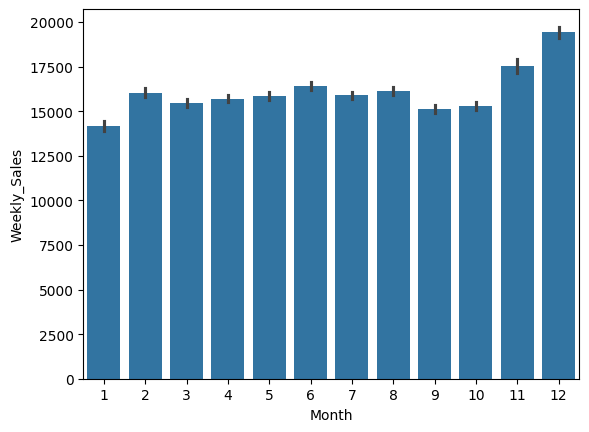

In [47]:
fig = sns.barplot(x='Month', y='Weekly_Sales', data=df)
plt.show()

Wee see that 11 and 12 month has tho highest sales, so we can assume that 2012 has the highest sales.

# Unemployment, Fuel, Cpi, Temperature effect 

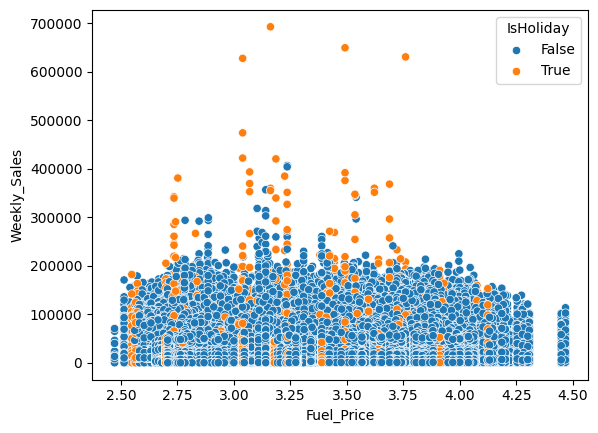

In [50]:
sns.scatterplot(x='Fuel_Price',y='Weekly_Sales', data=df, hue='IsHoliday')
plt.show()

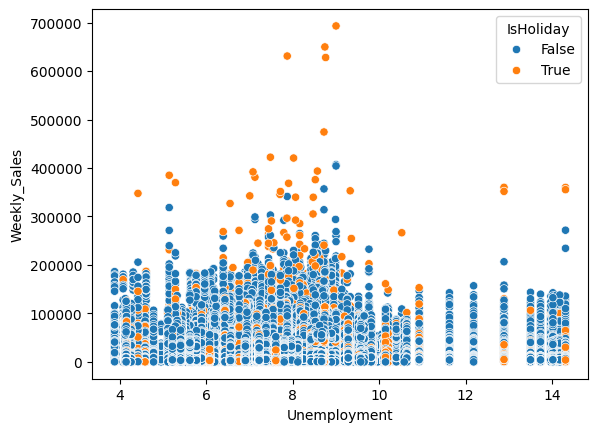

In [51]:
sns.scatterplot(x='Unemployment',y='Weekly_Sales', data=df, hue='IsHoliday')
plt.show()

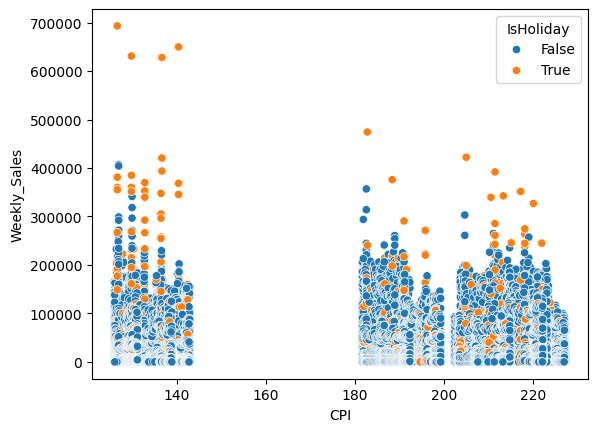

In [52]:
sns.scatterplot(x='CPI',y='Weekly_Sales', data=df, hue='IsHoliday')
plt.show()

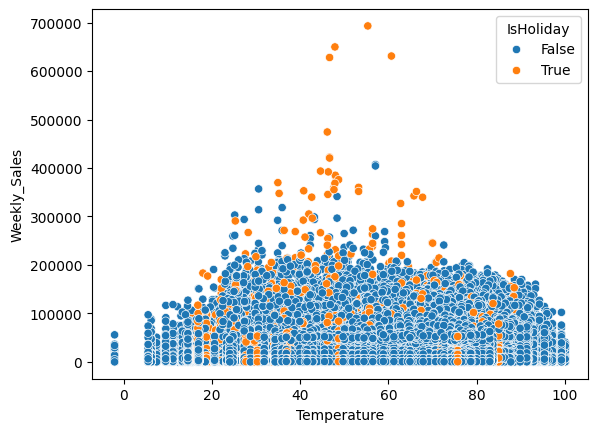

In [53]:
sns.scatterplot(x='Temperature',y='Weekly_Sales', data=df, hue='IsHoliday')
plt.show()

We see that there is not much correlation between Cpi, Temperature, Fuel Price and Unemployment. 

In [55]:
cols = ['Thanksgiving','Christmas','Labor_Day','Super_Bowl']
df=df.drop(cols, axis=1)

We will drop columns in cols because we have them in IsHoliday column

# Encoding Data 

In [58]:
dummies = pd.get_dummies(df["Type"], prefix="Type").astype(int)
print(dummies)

        Type_A  Type_B  Type_C
0            1       0       0
1            1       0       0
2            1       0       0
3            1       0       0
4            1       0       0
...        ...     ...     ...
421565       0       1       0
421566       0       1       0
421567       0       1       0
421568       0       1       0
421569       0       1       0

[420212 rows x 3 columns]


In [59]:
df = pd.concat(
    [df.drop(columns=["Type"]), dummies],
    axis=1
)

In [60]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Size,Week,Month,Year,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,151315,5,2,2010,1,0,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,151315,6,2,2010,1,0,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,151315,7,2,2010,1,0,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,151315,8,2,2010,1,0,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,151315,9,3,2010,1,0,0


In [61]:
df["IsHoliday"] = df["IsHoliday"].astype(int)

In [62]:
pd.set_option("display.max_columns", None)

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,5,2,2010,1,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,6,2,2010,1,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,7,2,2010,1,0,0
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,8,2,2010,1,0,0
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,9,3,2010,1,0,0


In [63]:
df["week_sin"]  = np.sin(2 * np.pi * df["Week"] / 52)
df["week_cos"]  = np.cos(2 * np.pi * df["Week"] / 52)

df["month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

df = df.drop(columns=["Week", "Month"])

In [64]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Type_A,Type_B,Type_C,week_sin,week_cos,month_sin,month_cos
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,2010,1,0,0,0.568065,0.822984,0.866025,5.000000e-01
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,2010,1,0,0,0.663123,0.748511,0.866025,5.000000e-01
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,2010,1,0,0,0.748511,0.663123,0.866025,5.000000e-01
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,2010,1,0,0,0.822984,0.568065,0.866025,5.000000e-01
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,2010,1,0,0,0.885456,0.464723,1.000000,6.123234e-17


In [65]:
lags = [1,2,4]
roll = [2,4,8]

In [66]:
for i in lags:
    df[f"Lag_{i}"] = df['Weekly_Sales'].shift(i)

for k in roll:
    df[f"rolling_mean_{k}"] = df['Weekly_Sales'].shift(1).rolling(window=k).mean()
    df[f"rolling_std_{k}"] = df['Weekly_Sales'].shift(1).rolling(window=k).std()


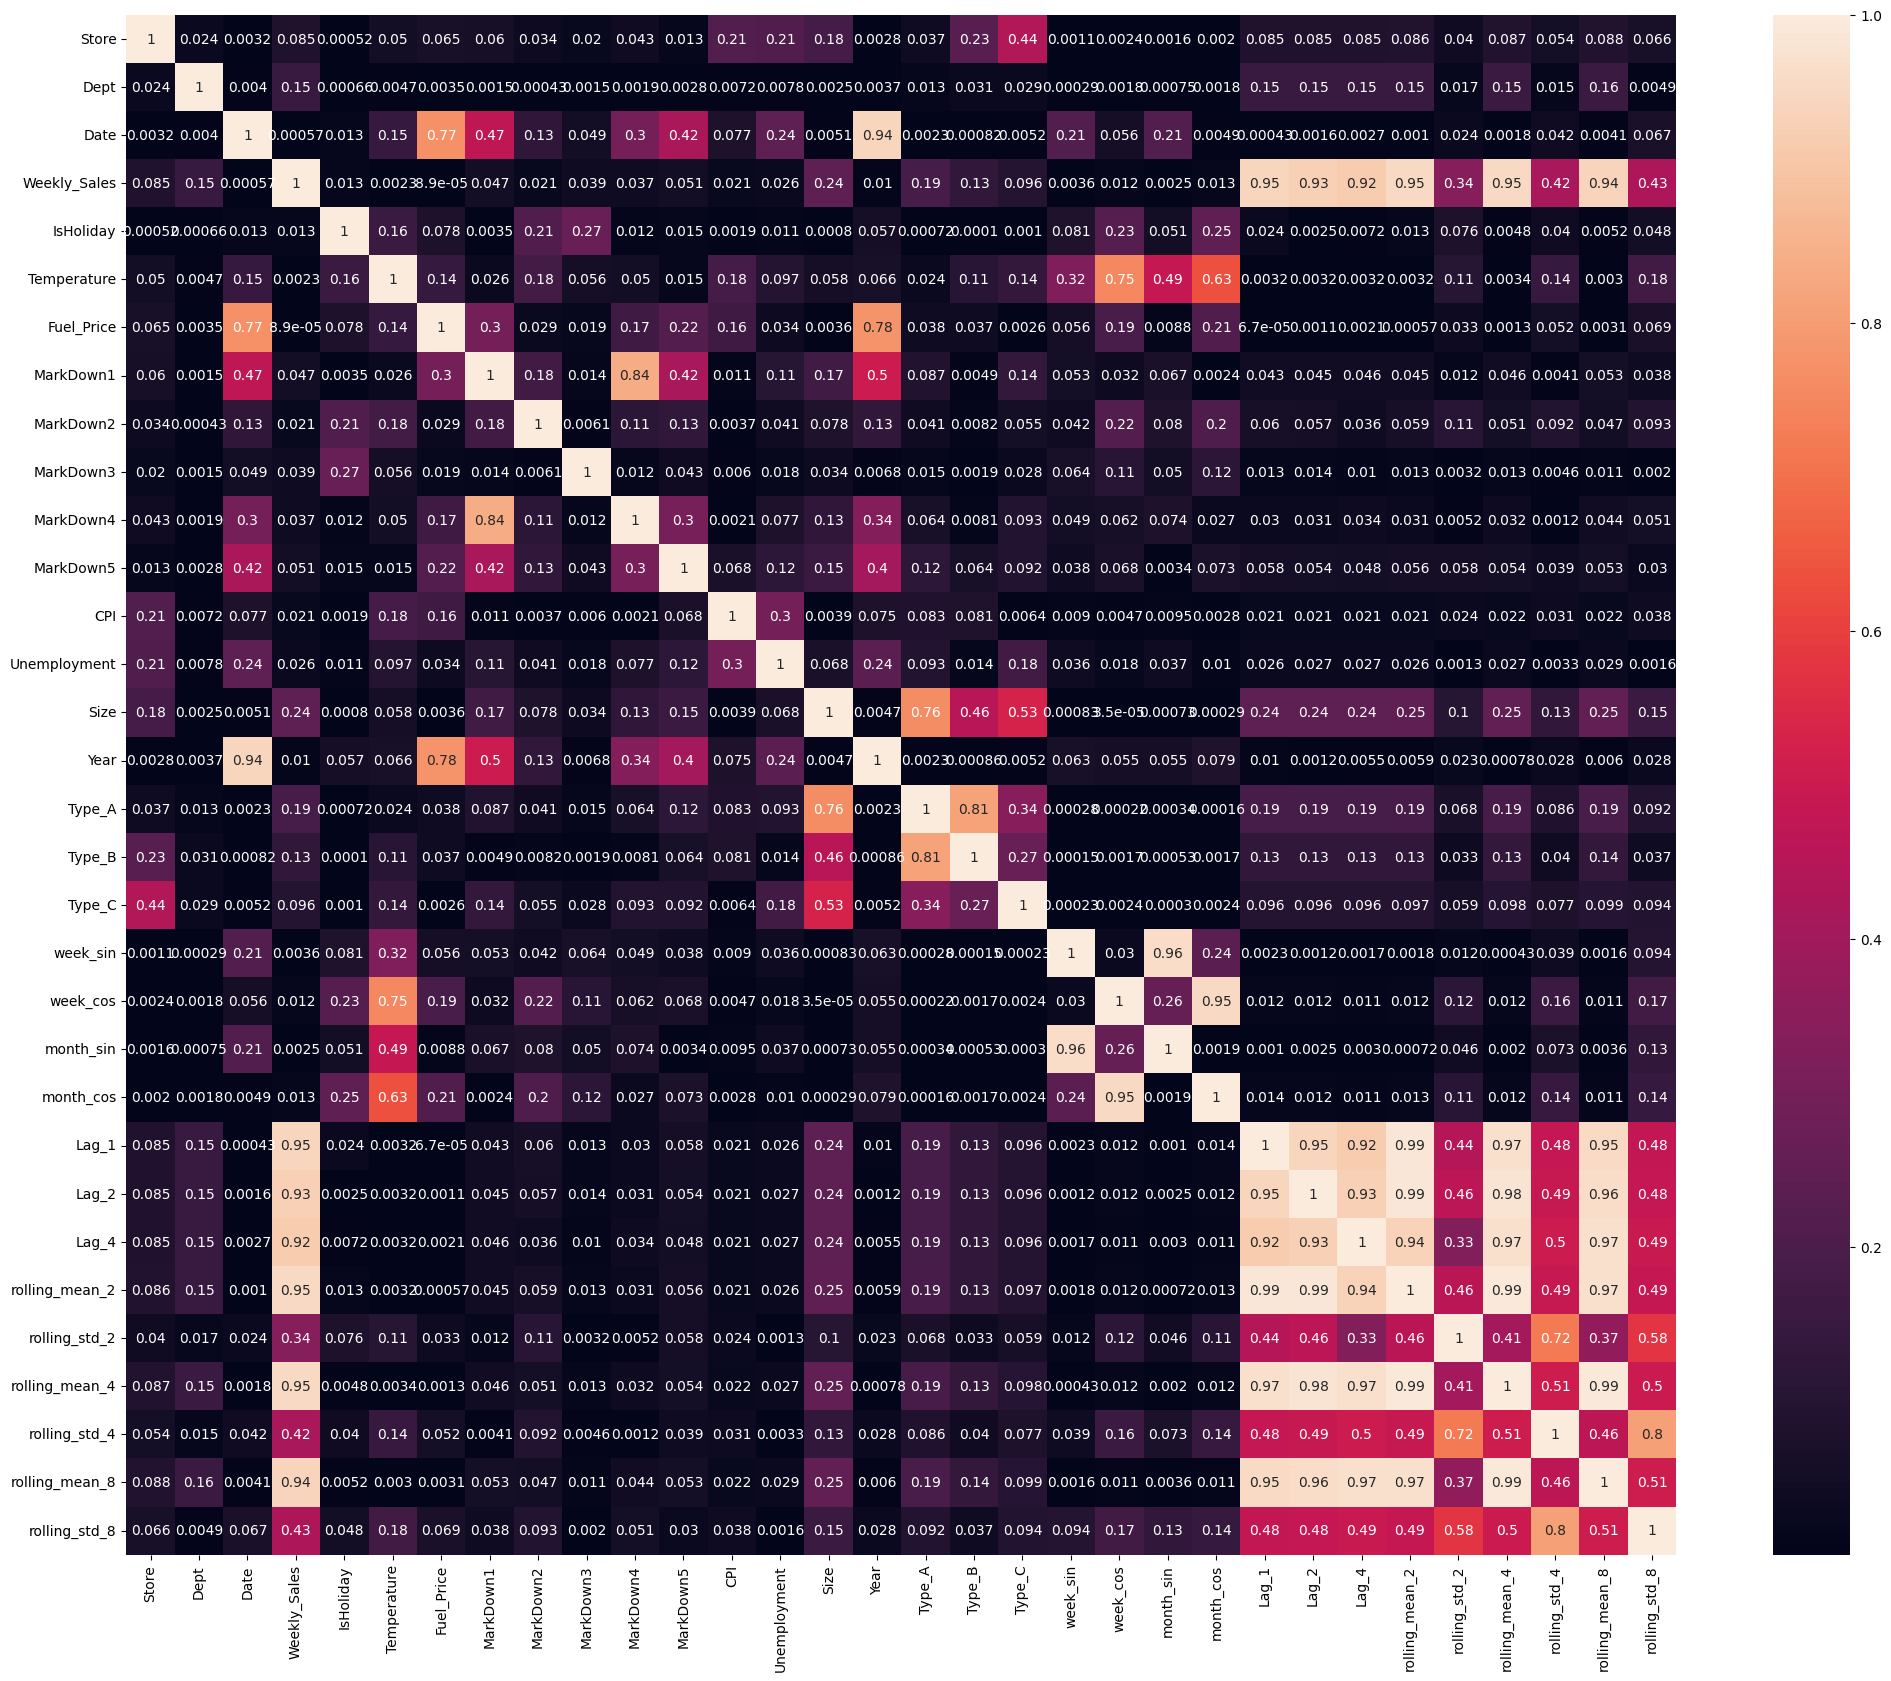

In [126]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr().abs(), annot=True)    # To see the correlations
plt.show()

In [68]:
df.dtypes

Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
IsHoliday                  int32
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDown5                float64
CPI                      float64
Unemployment             float64
Size                       int64
Year                       int32
Type_A                     int32
Type_B                     int32
Type_C                     int32
week_sin                 Float64
week_cos                 Float64
month_sin                float64
month_cos                float64
Lag_1                    float64
Lag_2                    float64
Lag_4                    float64
rolling_mean_2           float64
rolling_std_2            float64
rolling_mean_4           float64
rolling_std_4            float64
rolling_me

# Summary

1. We merged our data in one dataset.
2. We did our EDA, visualised the correlations of features with our target(Weekly_Sales).


